In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

sns.set(rc={'figure.figsize':(11, 4)})


In [2]:
# Overview of data (VS Code path + fixed prints)

def overview():
    df = pd.read_csv("../data/Meat_prices.csv")
    print("The first 5 rows of data are:\n")
    display(df.head())  # fixed
    print("\nDataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
    print("\nDatatype:\n")
    display(df.dtypes)
    print("\nThe number of null values for each column are:\n")
    display(df.isnull().sum())
    print("\nData summary:\n")
    display(df.describe())
    return df

data = overview()


The first 5 rows of data are:



,Month,Chicken Price,Chicken price % Change,Beef Price,Beef price % Change,Lamb price,Lamb price % Change,Pork Price,Pork price % Change,Salmon Price,Salmon price % Change
0,Apr-90,1.08,NaN,2.47,NaN,2.63,NaN,99.64,NaN,5.63,NaN
1,May-90,1.08,0.00%,2.48,0.40%,2.71,3.04%,115.68,16.10%,5.80,3.02%
2,Jun-90,1.11,2.78%,2.50,0.81%,2.72,0.37%,121.46,5.00%,5.67,-2.24%
3,Jul-90,1.10,-0.90%,2.56,2.40%,2.77,1.84%,96.19,-20.81%,5.74,1.23%
4,Aug-90,1.10,0.00%,2.65,3.52%,2.66,-3.97%,93.97,-2.31%,5.92,3.14%



Dataset has 361 rows and 11 columns

Datatype:



Month                      object
Chicken Price             float64
Chicken price % Change     object
Beef Price                float64
Beef price % Change        object
Lamb price                float64
Lamb price % Change        object
Pork Price                float64
Pork price % Change        object
Salmon Price              float64
Salmon price % Change      object
dtype: object


The number of null values for each column are:



Month                      0
Chicken Price              0
Chicken price % Change     1
Beef Price                 0
Beef price % Change        1
Lamb price                26
Lamb price % Change       27
Pork Price                34
Pork price % Change       35
Salmon Price              34
Salmon price % Change     35
dtype: int64


Data summary:



,Chicken Price,Beef Price,Lamb price,Pork Price,Salmon Price
count,361.000000,361.000000,335.000000,327.000000,327.000000
mean,1.630693,2.971440,4.038299,68.709817,4.825933
std,0.386952,1.044637,1.296284,18.521211,1.349034
min,1.030000,1.640000,2.150000,19.100000,2.400000
25%,1.310000,2.120000,2.805000,55.345000,3.760000
50%,1.570000,2.610000,3.940000,65.890000,4.710000
75%,1.940000,4.030000,4.900000,78.095000,5.630000
max,2.720000,6.000000,7.000000,128.670000,8.640000


In [ ]:
From the initial inspection, we observe that the dataset contains 361 rows and 11 columns, representing monthly meat prices from 1990 to 2020.

Several price percentage change columns are stored as object data types because they contain the % symbol. These columns must be cleaned and converted to numerical values before analysis.

We also observe missing values in multiple columns. Some columns such as Chicken price % Change and Beef price % Change contain only one missing value, which can be safely removed. However, other columns (Lamb, Pork, and Salmon prices and their percentage changes) have a significant number of missing values (>5%), so we will replace those missing values using the median strategy.

In [3]:
# Remove % and handle missing values

# Remove % symbol
data = data.replace('%', '', regex=True)

# Drop rows with NaN for chicken and beef % change (only 1 NaN each)
data = data.dropna(subset=['Chicken price % Change', 'Beef price % Change'])

# Check remaining NaNs
data.isnull().sum()


Month                      0
Chicken Price              0
Chicken price % Change     0
Beef Price                 0
Beef price % Change        0
Lamb price                26
Lamb price % Change       26
Pork Price                34
Pork price % Change       34
Salmon Price              34
Salmon price % Change     34
dtype: int64

In [4]:
# Convert numeric columns and replace remaining NaNs with median

# Convert percentage and price columns to numeric
cols_to_numeric = [
    'Chicken price % Change',
    'Beef price % Change',
    'Lamb price',
    'Lamb price % Change',
    'Pork Price',
    'Pork price % Change',
    'Salmon Price',
    'Salmon price % Change'
]

for col in cols_to_numeric:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Replace remaining NaN values with median
imputer = SimpleImputer(strategy='median')
data[cols_to_numeric[2:]] = imputer.fit_transform(data[cols_to_numeric[2:]])

data.isnull().sum()


Month                     0
Chicken Price             0
Chicken price % Change    0
Beef Price                0
Beef price % Change       0
Lamb price                0
Lamb price % Change       0
Pork Price                0
Pork price % Change       0
Salmon Price              0
Salmon price % Change     0
dtype: int64

In [5]:
# Convert Month to datetime and fix data types

data["Month"] = pd.to_datetime(
    data["Month"].astype(str).str.upper(),
    format='%b-%y',
    errors='coerce'
)

# Remove rows where Month could not be parsed
data = data.dropna(subset=["Month"])

# Convert % change columns to float
data["Chicken price % Change"] = data["Chicken price % Change"].astype(float)
data["Beef price % Change"] = data["Beef price % Change"].astype(float)

data.dtypes


Month                     datetime64[ns]
Chicken Price                    float64
Chicken price % Change           float64
Beef Price                       float64
Beef price % Change              float64
Lamb price                       float64
Lamb price % Change              float64
Pork Price                       float64
Pork price % Change              float64
Salmon Price                     float64
Salmon price % Change            float64
dtype: object

In [6]:
# Set Month as index

data = data.set_index("Month").sort_index()
data.head()


,Chicken Price,Chicken price % Change,Beef Price,Beef price % Change,Lamb price,Lamb price % Change,Pork Price,Pork price % Change,Salmon Price,Salmon price % Change
Month,,,,,,,,,,
1990-05-01,1.08,0.00,2.48,0.40,2.71,3.04,115.68,16.10,5.80,3.02
1990-06-01,1.11,2.78,2.50,0.81,2.72,0.37,121.46,5.00,5.67,-2.24
1990-07-01,1.10,-0.90,2.56,2.40,2.77,1.84,96.19,-20.81,5.74,1.23
1990-08-01,1.10,0.00,2.65,3.52,2.66,-3.97,93.97,-2.31,5.92,3.14
1990-09-01,1.09,-0.91,2.70,1.89,2.70,1.50,95.68,1.82,6.29,6.25


In [ ]:
# Plotting section 

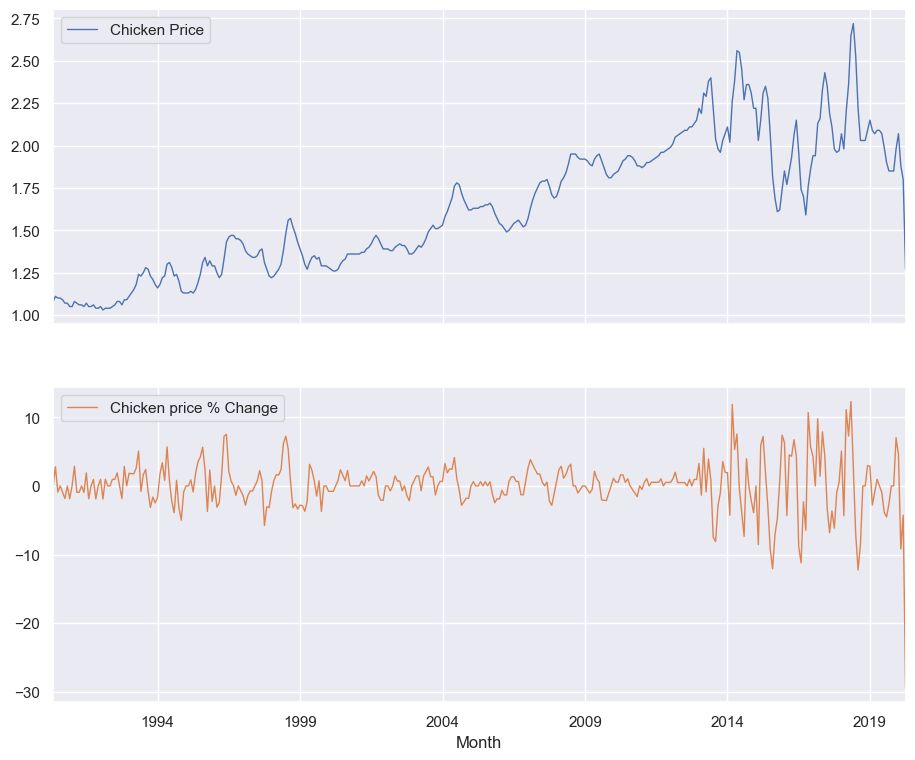

In [7]:
# Chicken prices

data[["Chicken Price", "Chicken price % Change"]].plot(
    figsize=(11, 9), subplots=True, linewidth=1
)
plt.show()


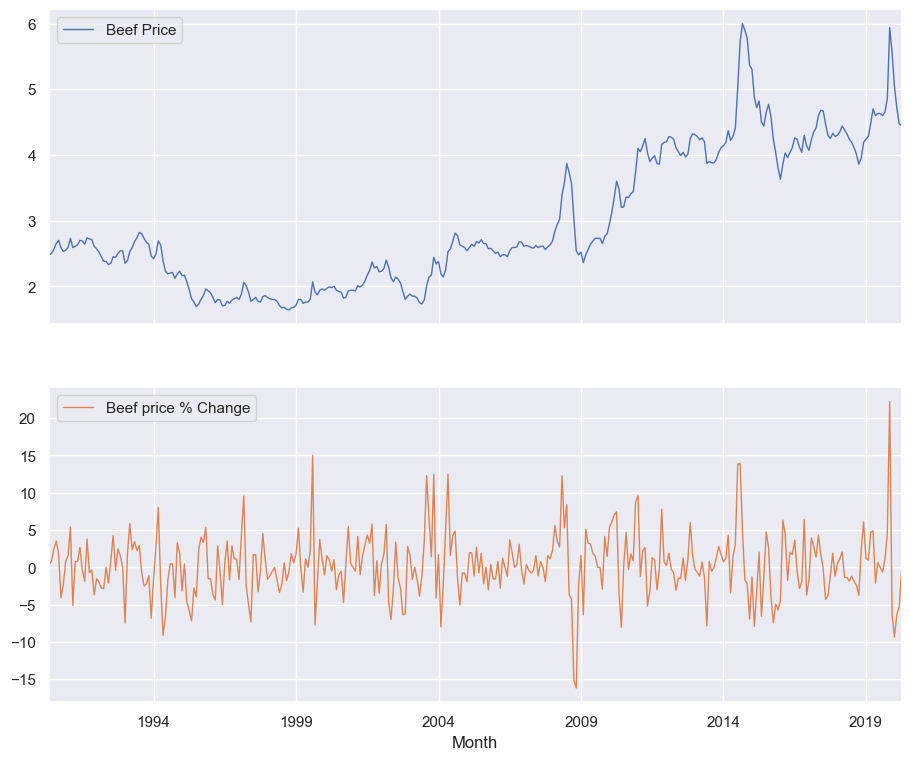

In [8]:
# Beef prices

data[["Beef Price", "Beef price % Change"]].plot(
    figsize=(11, 9), subplots=True, linewidth=1
)
plt.show()


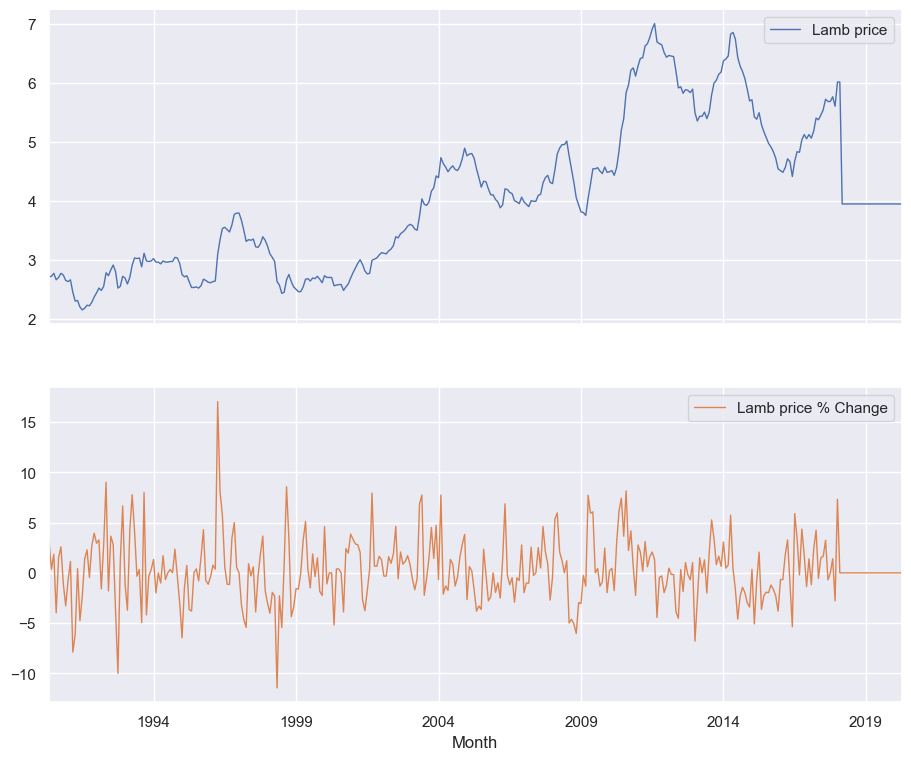

In [9]:
# Lamb prices

data[["Lamb price", "Lamb price % Change"]].plot(
    figsize=(11, 9), subplots=True, linewidth=1
)
plt.show()


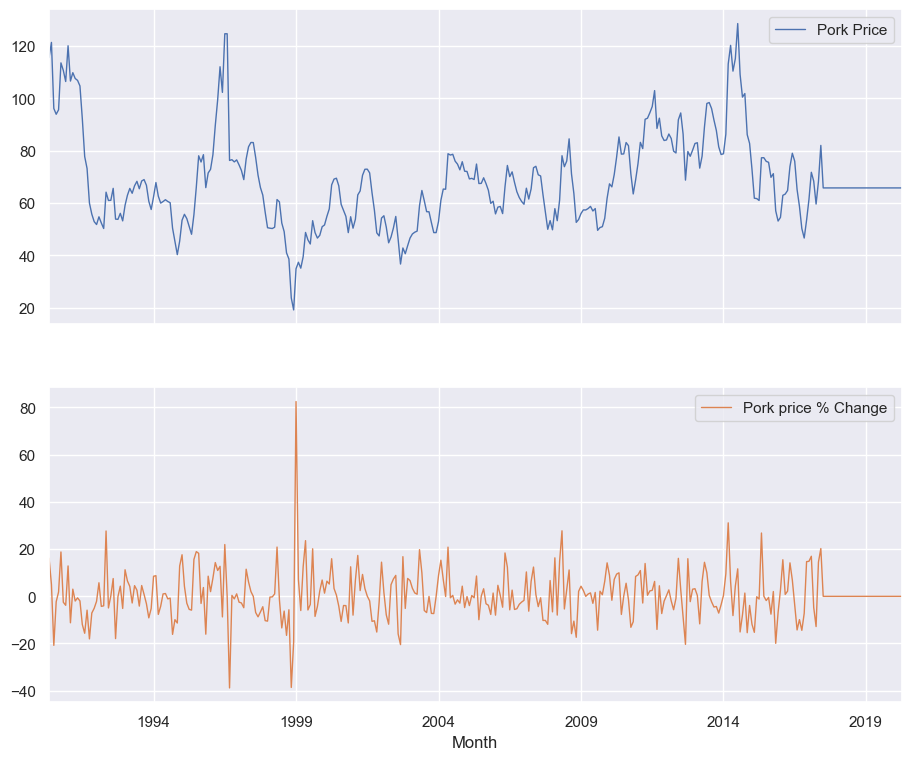

In [10]:
# Pork prices

data[["Pork Price", "Pork price % Change"]].plot(
    figsize=(11, 9), subplots=True, linewidth=1
)
plt.show()


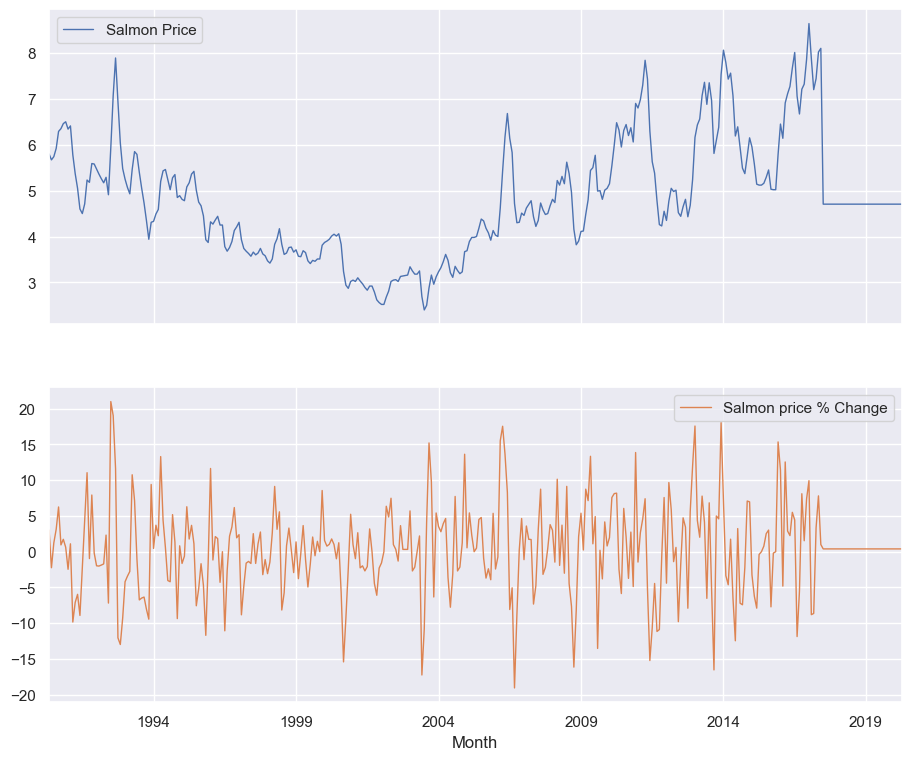

In [11]:
# Salmon prices

data[["Salmon Price", "Salmon price % Change"]].plot(
    figsize=(11, 9), subplots=True, linewidth=1
)
plt.show()


In [ ]:
The analysis shows that meat prices generally increased over time, with noticeable volatility during economic downturns and global events such as the COVID-19 pandemic. Chicken prices experienced sharp fluctuations after 2014, while beef and lamb prices showed long-term upward trends driven by global demand and supply constraints. Understanding these patterns helps explain price hikes and can assist households in planning grocery budgets more effectively